In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.tools import add_constant
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


%matplotlib inline

In [3]:
iris = datasets.load_iris()

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [5]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target_names[iris.target]
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [7]:
x = df.drop(['target'], axis = 1)
y = df['target']

x_train,x_test,y_train,y_test = train_test_split(x,y, train_size = 0.75)

In [8]:
x_test.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
80,5.5,2.4,3.8,1.1
138,6.0,3.0,4.8,1.8
128,6.4,2.8,5.6,2.1
7,5.0,3.4,1.5,0.2
113,5.7,2.5,5.0,2.0


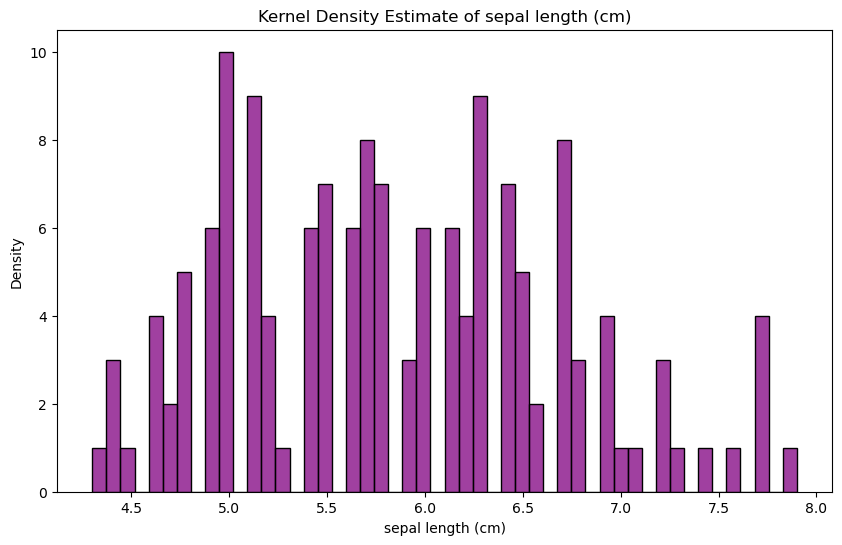

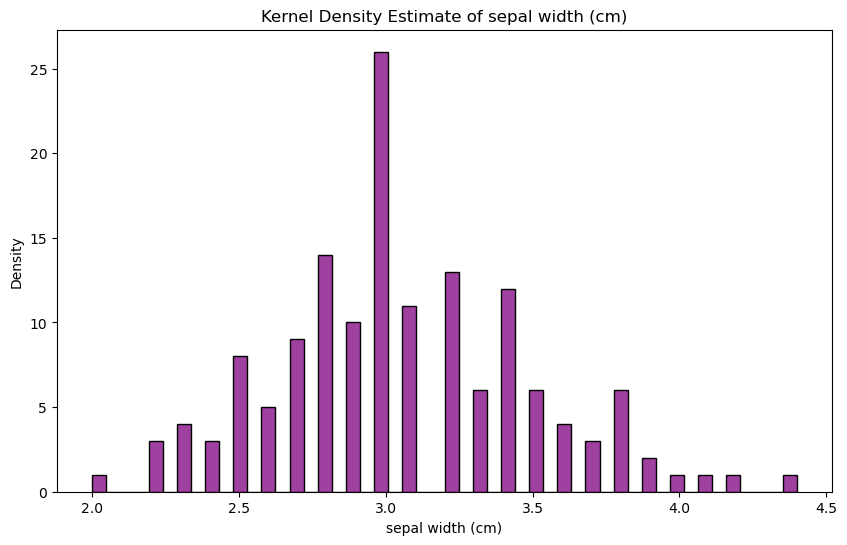

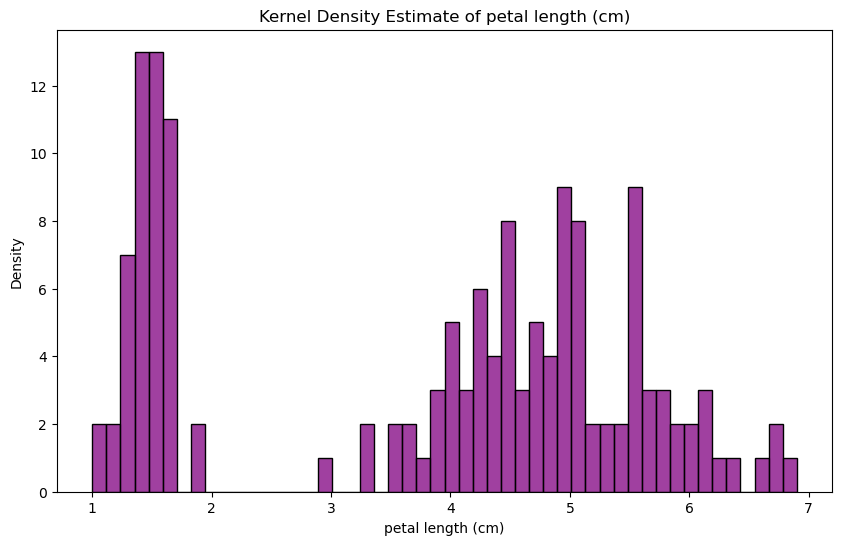

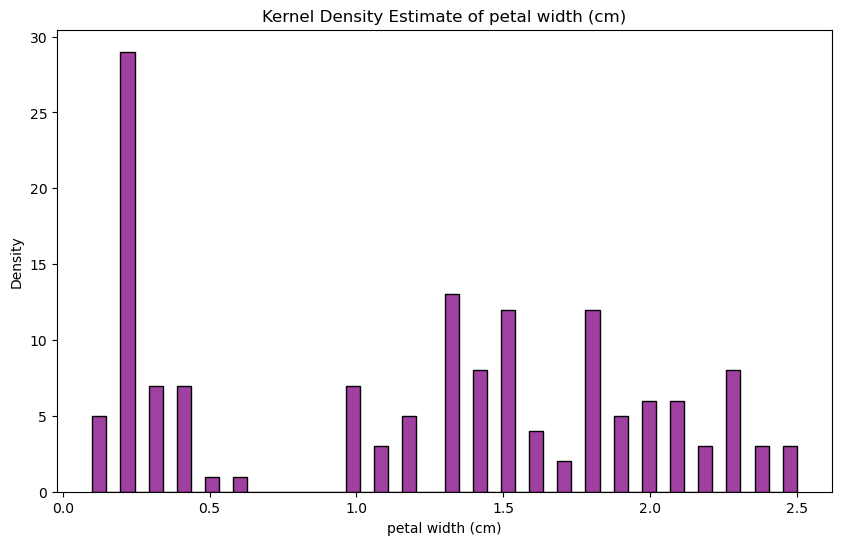

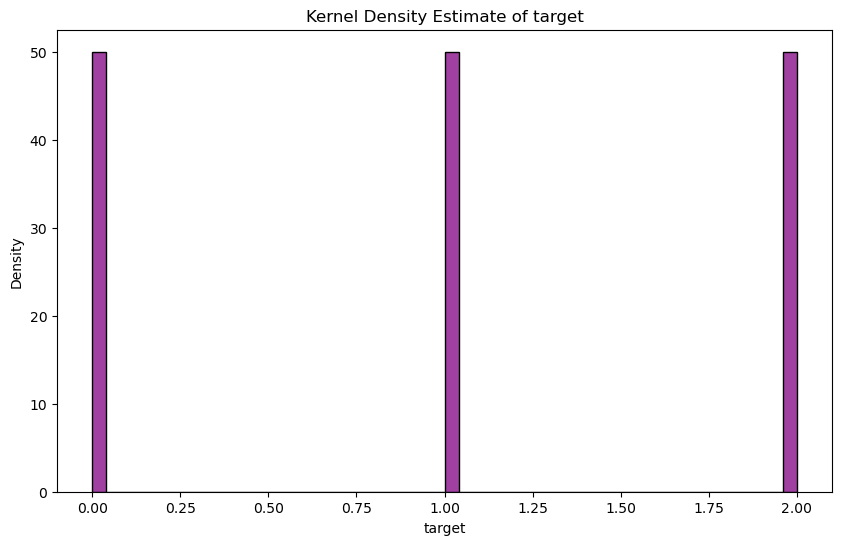

In [9]:
for column in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], bins = 50, color = "purple")
    plt.title(f'Kernel Density Estimate of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()

In [10]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 0.03930591374473039
R-squared: 0.9458418516723371


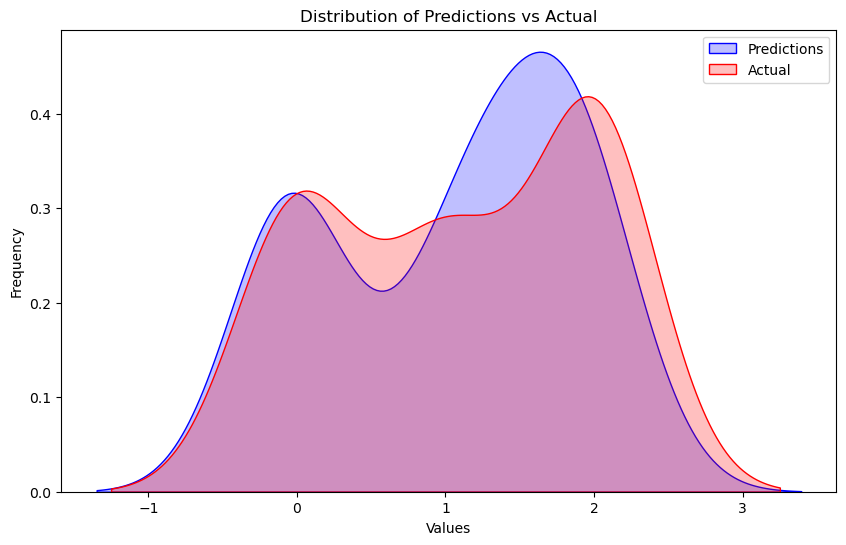

In [11]:
plt.figure(figsize=(10, 6))
sns.kdeplot(y_pred, color="blue", label="Predictions", fill=True)
sns.kdeplot(y_test, color="red", label="Actual", fill=True)

plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Distribution of Predictions vs Actual")
plt.legend()

plt.show()